### Standard imports

In [59]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd 
from pandas import DataFrame

### Importing modules to predict time series data

In [17]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

from sklearn.metrics import mean_squared_error

In [18]:
df = pd.read_csv('bitcoin_price.csv',parse_dates=['Date'])

In [19]:
df.head(2)

,Date,Open,High,Low,Close,Volume,Market Cap
0,2018-02-20,11231.8,11958.5,11231.8,11403.7,"9,926,540,000","189,536,000,000"
1,2018-02-19,10552.6,11273.8,10513.2,11225.3,"7,652,090,000","178,055,000,000"


In [20]:
print(df.describe())

               Open          High           Low         Close
count   1760.000000   1760.000000   1760.000000   1760.000000
mean    1479.574239   1536.991108   1418.251273   1485.747000
std     2950.457188   3092.950362   2780.859459   2959.265478
min       68.500000     74.560000     65.530000     68.430000
25%      274.730000    279.857500    268.640000    274.875000
50%      480.715000    495.195000    472.510000    482.810000
75%      870.085000    900.222500    831.682500    871.370000
max    19475.800000  20089.000000  18974.100000  19497.400000


In [21]:
df1 = df[['Close','Date']]

In [22]:
df1.head(2)

,Close,Date
0,11403.7,2018-02-20
1,11225.3,2018-02-19


In [23]:
df_ts = df1.set_index('Date')

In [25]:
df_ts.sort_index(inplace=True)

In [27]:
df_ts.head(2)

,Close
Date,
2013-04-28,134.21
2013-04-29,144.54


### Basic plot

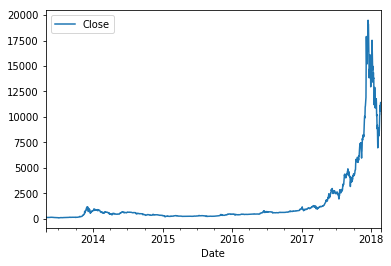

In [28]:
df_ts.plot()

### Dickey fuller test

This is a test for stationarity of a time series. In this the null hypothesis is that there are unit roots.<br/>
If the null hypothesis is true then it is non stationary else it is stationary and we can analyse it.

In [74]:
# Dickey fuller test function
def test_stationarity(timeseries):
    from statsmodels.tsa.stattools import adfuller # augmented dickey fuller
    dftest = adfuller(timeseries,autolag='AIC')
    # taking the first four rows of the series and indexing it
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', '#Observations Used']) 
    
    print(dfoutput)
    print(type(dftest[4])) # The item 4 is a dictionary
    
    for key,value in dftest[4].items(): # This will return the key and item values of the dictionary
        
        print('Critical value {0} is {1}'.format(key,value))

In [75]:
ts = df_ts['Close'] # converting the df into series
test_stationarity(ts)

Test Statistic          -1.360453
p-value                  0.601082
#lags Used              25.000000
#Observations Used    1734.000000
dtype: float64
<class 'dict'>
Critical value 1% is -3.434126820603039
Critical value 5% is -2.8632082555189444
Critical value 10% is -2.5676581314612825


In our case the Test statistic value is more than the hypothesis value so we cannot reject the null hypothesis and so it is non stationary

In [46]:
list_df = df_ts[['Close']] # extracting the column as DF and not a Series , for Series df_ts['Close']

### Rolling average
It will remove the sesonality <br/>
It involves taking the average of the points before and after it , this will smooth out the curve.<br/>
You have to determine the window (20) among which the avg is to be taken

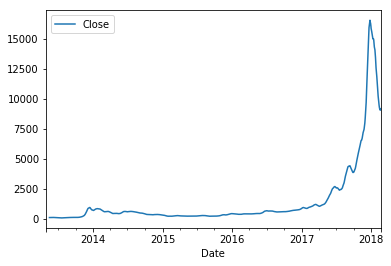

In [47]:
list_df.rolling(20).mean().plot()

### Rolling variance


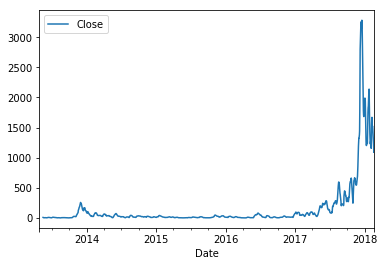

In [76]:
list_df.rolling(20).std().plot()

### Differencing
Differencing will give you an idea about seasonality

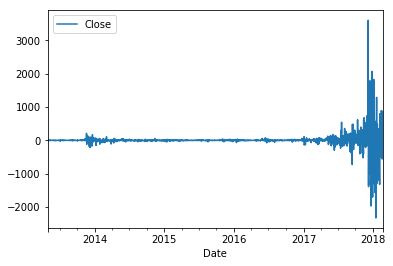

In [52]:
list_df.diff().plot()

### Correlation

In [54]:
# df_ts.corr() # This will not give any value as there are no others columns for it to compare with

The correlation with seasonality

In [55]:
#df_ts.diff().corr()

### Autocrrelation
Taking the correlation with itself <br\>
Analysisng the autocorrelation plot : It is a plot of autocorrelation values against the lag. If the phenonmenon is random then the graph will be near the zero line , else if they are not random then they will have a positive value for a lag.<br\>
In our case the lag is 300.

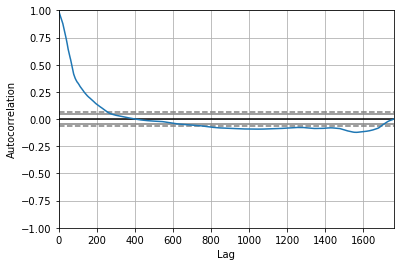

In [58]:
pd.plotting.autocorrelation_plot(df_ts['Close'])

# Predicting / Forecasting
Using ARIMA model

In [5]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas import DataFrame
import pandas as pd
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings('ignore')

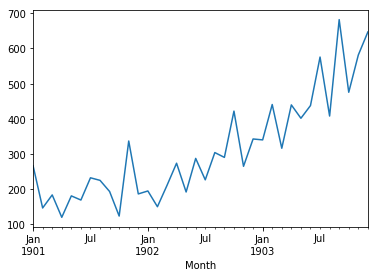

In [6]:
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
series = read_csv('sales-of-shampoo-over-a-three-ye.csv', parse_dates=[0], index_col=0,squeeze=True, date_parser=parser)
# squeeze set to true will return a Series if the parsed data has only one column
# date_parser is a function that will parse the date based on a function
# index_col will set the col as index
series.plot()
pyplot.show()

The plot shows that the data is not non-stationary so it has to be differenced at least once <br\>
plot the autocorrelation value to find the lag, in our case there is a significant positive value for the lag of 5

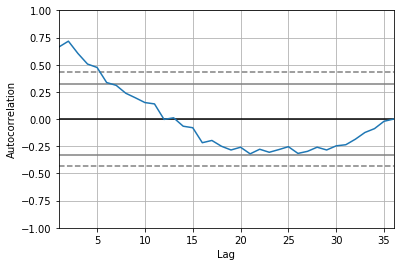

In [7]:
pd.plotting.autocorrelation_plot(series)

In [8]:
model = ARIMA(series,order=(5,1,0))
model_fit = model.fit(disp=0) # setting disp to zero makes sure that there are no debug logs displayes
print(model_fit.summary())

                                          ARIMA Model Results                                          
Dep. Variable:     D.Sales of shampoo over a three year period   No. Observations:                   35
Model:                                          ARIMA(5, 1, 0)   Log Likelihood                -196.170
Method:                                                css-mle   S.D. of innovations             64.241
Date:                                         Sun, 22 Apr 2018   AIC                            406.340
Time:                                                 07:18:55   BIC                            417.227
Sample:                                             02-01-1901   HQIC                           410.098
                                                  - 12-01-1903                                         
                                                        coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------

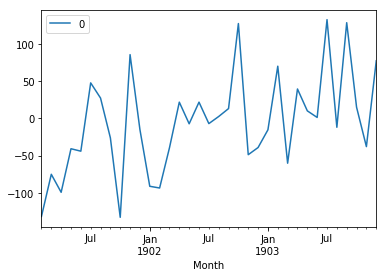

In [9]:
#plotting the rsidulas
residul = DataFrame(model_fit.resid)
residul.plot()
pyplot.show()

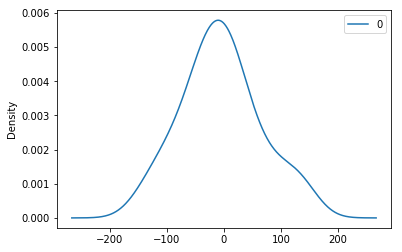

                0
count   35.000000
mean    -5.495189
std     68.132884
min   -133.296583
25%    -42.477916
50%     -7.186570
75%     24.748367
max    133.237999


In [10]:
residul.plot(kind='kde') # gaussian plot
pyplot.show()

print(residul.describe())

### Forecasting

In [11]:
output = model_fit.forecast(36) # the index can be passed to find the value
output[0]


array([ 564.21351807,  675.40642117,  577.12706386,  689.5574699 ,
        641.86592394,  673.05864369,  691.39595931,  679.40225522,
        727.76009476,  702.16962125,  743.80657622,  737.19175439,
        757.54649529,  770.74135333,  774.59095859,  798.22053531,
        798.71227678,  820.31824767,  825.99282785,  840.88722584,
        853.27976655,  862.84426114,  878.48651051,  886.84185918,
        902.02389983,  912.00078097,  925.0134029 ,  937.12480469,
        948.43472319,  961.62891341,  972.50605042,  985.57526256,
        996.95724907, 1009.34551721, 1021.40778639, 1033.24238211])

### Creating the function
We can split the training dataset into train and test sets, use the train set to fit the model, and generate a prediction for each element on the test set.<br\>

A rolling forecast is required given the dependence on observations in prior time steps for differencing and the AR model. A crude way to perform this rolling forecast is to re-create the ARIMA model after each new observation is received.<br\>

We manually keep track of all observations in a list called history that is seeded with the training data and to which new observations are appended each iteration.<br\>

predicted=349.117677, expected=342.300000
predicted=306.513008, expected=339.700000
predicted=387.376434, expected=440.400000
predicted=348.154253, expected=315.900000
predicted=386.308781, expected=439.300000
predicted=356.082097, expected=401.300000
predicted=446.379514, expected=437.400000
predicted=394.737301, expected=575.500000
predicted=434.915489, expected=407.600000
predicted=507.923423, expected=682.000000
predicted=435.482775, expected=475.300000
predicted=652.743772, expected=581.300000
predicted=546.343495, expected=646.900000
Test MSE: 6958.325


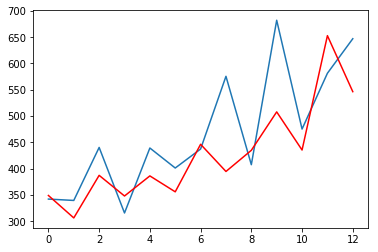

In [12]:
from sklearn.metrics import mean_squared_error

X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train] # passing each value into the list
predictions = list() # initalizing the predictions
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()